In [1]:
import pickle
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
# from matplotlib.backends.backend_pgf import FigureCanvasPgf
# matplotlib.backend_bases.register_backend('pdf', FigureCanvasPgf)
# matplotlib.use('pgf')
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

## FC graph without legend (BOTTOM for report)

In [3]:
folder = 'data_initial_exp_w_fc/'

features = [5, 10, 15]
ps_epochs = [300, 200, 100]
spsb_epochs = [6100, 8066, 6033]

loss_spsa = {}
loss_ps = {}
acc_spsa = {}
acc_ps = {}
evals_spsa = {}
evals_ps = {}
for ft, p_ep, s_ep in zip(features, ps_epochs, spsb_epochs):
    loss_spsa[ft] = np.load(folder + f"fc_spsb_loss_niter10_nfeatures{ft}_nlayers3_batchsize25_nepochs{s_ep}_lr0.01.npy")
    loss_ps[ft] = np.load(folder + f"fc_ps_loss_niter10_nfeatures{ft}_nlayers3_batchsize25_nepochs{p_ep}_lr0.01.npy")
    acc_spsa[ft] = np.load(folder + f"fc_spsb_acc_niter10_nfeatures{ft}_nlayers3_batchsize25_nepochs{s_ep}_lr0.01.npy")
    acc_ps[ft] = np.load(folder + f"fc_ps_acc_niter10_nfeatures{ft}_nlayers3_batchsize25_nepochs{p_ep}_lr0.01.npy")
    evals_spsa[ft] = np.load(folder + f"fc_spsb_evals_niter10_nfeatures{ft}_nlayers3_batchsize25_nepochs{s_ep}_lr0.01.npy")
    evals_ps[ft] = np.load(folder + f"fc_ps_evals_niter10_nfeatures{ft}_nlayers3_batchsize25_nepochs{p_ep}_lr0.01.npy")

In [4]:
# calculate median and 95% confidence interval
loss_spsa_median = {}
loss_ps_median = {}
loss_spsa_ci = {}
loss_ps_ci = {}
acc_spsa_median = {}
acc_ps_median = {}
acc_spsa_ci = {}
acc_ps_ci = {}
for ft in features:
    loss_spsa_median[ft] = np.mean(loss_spsa[ft], axis=0)
    loss_ps_median[ft] = np.mean(loss_ps[ft], axis=0)
    loss_spsa_ci[ft] = 1.96 * np.std(loss_spsa[ft], axis=0) / np.sqrt(loss_spsa[ft].shape[0])
    loss_ps_ci[ft] = 1.96 * np.std(loss_ps[ft], axis=0) / np.sqrt(loss_ps[ft].shape[0])
    acc_spsa_median[ft] = np.mean(acc_spsa[ft], axis=0)
    acc_ps_median[ft] = np.mean(acc_ps[ft], axis=0)
    acc_spsa_ci[ft] = 1.96 * np.std(acc_spsa[ft], axis=0) / np.sqrt(acc_spsa[ft].shape[0])
    acc_ps_ci[ft] = 1.96 * np.std(acc_ps[ft], axis=0) / np.sqrt(acc_ps[ft].shape[0])

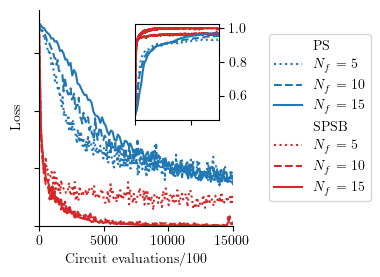

In [5]:
diff_features = [5, 10, 15] #sorted(set([f for f, _ in hists.keys()]))

linestyles = list(reversed(['solid', 'dashed', 'dotted'])) #, 'dashdot'
w = 2.5
h = 2.8
batch_size = 25
fig, ax = plt.subplots(figsize=(w, h))
axins = inset_axes(ax, width=w/3, height=h/3.5 * 1.2, borderpad=1, loc='upper right')
# axins = axins.twinx()
spsb_step = 100
ps_step = 3
for i, ft in enumerate(diff_features):
    # for (n_feature, batch_size) in hists:

    axins.plot(evals_spsa[ft][::4]/100, acc_spsa_median[ft] , label='Acc SPSA', color=u'#d62728', linestyle=linestyles[i])
    # ax.fill_between(circ_evals_spsa/100,
    #                     acc_spsa_means - acc_spsa_dev,
    #                     acc_spsa_means + acc_spsa_dev,
    #                     color=u'#d62728', alpha=0.2)
    axins.plot(evals_ps[ft][::4]/100, acc_ps_median[ft], label='Acc PS', color=u'#1f77b4', linestyle=linestyles[i])
    # ax.fill_between(circ_evals_pmshift/100,
    #                     acc_pms_means - acc_pms_dev,
    #                     acc_pms_means + acc_pms_dev,
    #                     color=u'#2ca02c', alpha=0.2)
    ax.plot(evals_spsa[ft][::spsb_step]/100,loss_spsa_median[ft][::spsb_step], label=f'$N_f$ = {ft:<3}', color=u'#d62728', linestyle=linestyles[i])
    # ax.fill_between(circ_evals_spsa/100,
    #                     loss_spsa_means - loss_spsa_dev,
    #                     loss_spsa_means + loss_spsa_dev,
    #                     color=u'#ff7f0e', alpha=0.2)
    ax.plot(evals_ps[ft][::ps_step]/100 , loss_ps_median[ft][::ps_step], label=f'$N_f$ = {ft:<3}', color=u'#1f77b4', linestyle=linestyles[i])
    # ax.fill_between(circ_evals_pmshift/100,
    #                     loss_pms_means - loss_pms_dev,
    #                     loss_pms_means + loss_pms_dev,
    #                     color=u'#1f77b4', alpha=0.2)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # plt.title(f'SPSA grads vs. gradient shift (s: {s_}, eps: {round(eps, 3)})')
ax.set_xlabel('Circuit evaluations/100')
axins.set_xticks(ax.get_xticks())
axins.set_xbound(ax.get_xbound())
axins_bound = axins.get_ybound()
axins.set_xticklabels([])
# axins.set_yticklabels([])
axins.set_ybound(axins_bound)
axins.set_xlim(0, 15000)
axins.yaxis.tick_right()
# move axins position a little bit up and left


ax.set_yticklabels([])
ax.set_ylim(0, 0.75)
ax.set_xlim(0, 15000)

ax.set_ylabel('Loss', labelpad=5)
# axins.set_ylabel('Accuracy', labelpad=5)
# sort both labels and handles by labels

PS_label = ax.plot([0.2],[0.2],color="w", label="PS")
SPSA_label = ax.plot([0.2],[0.2], color="w", label="SPSB")
handles, labels = ax.get_legend_handles_labels()
order = [6,1,3,5,7,0,2,4]
#024 135

ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc = "center left", bbox_to_anchor = (1.15, 0.5, 0.43, 0))
# labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0].split(' ')[-1]))
# ax.legend(handles, labels, loc = "center left", bbox_to_anchor = (1., 0.5, 0.43, 0))

title_1 = "Param Shift"
title_2 = "SPSB"

savename = f"Pennylane_SPSA_gradshift_full_comparison_with_fc_l3_e100_lr0.01_b{batch_size}_RIGHT.pdf"
plt.savefig(f"./figs/{savename}", bbox_inches="tight")

## FC first graph without legend (RHS)

In [6]:
folder = 'data_initial_exp_fc_first/'

features = [5, 10]  # 15
ps_epochs = [300, 200]  # 100
spsb_epochs = [6100, 8066]  # 6033

loss_spsa = {}
loss_ps = {}
acc_spsa = {}
acc_ps = {}
evals_spsa = {}
evals_ps = {}
for ft, p_ep, s_ep in zip(features, ps_epochs, spsb_epochs):
    loss_spsa[ft] = np.load(folder + f"fc_spsb_loss_niter10_nfeatures{ft}_nlayers3_batchsize25_nepochs{s_ep}_lr0.01.npy")
    loss_ps[ft] = np.load(folder + f"fc_ps_loss_niter10_nfeatures{ft}_nlayers3_batchsize25_nepochs{p_ep}_lr0.01.npy")
    acc_spsa[ft] = np.load(folder + f"fc_spsb_acc_niter10_nfeatures{ft}_nlayers3_batchsize25_nepochs{s_ep}_lr0.01.npy")
    acc_ps[ft] = np.load(folder + f"fc_ps_acc_niter10_nfeatures{ft}_nlayers3_batchsize25_nepochs{p_ep}_lr0.01.npy")
    evals_spsa[ft] = np.load(folder + f"fc_spsb_evals_niter10_nfeatures{ft}_nlayers3_batchsize25_nepochs{s_ep}_lr0.01.npy")
    evals_ps[ft] = np.load(folder + f"fc_ps_evals_niter10_nfeatures{ft}_nlayers3_batchsize25_nepochs{p_ep}_lr0.01.npy")

In [7]:
# calculate median and 95% confidence interval
loss_spsa_median = {}
loss_ps_median = {}
loss_spsa_ci = {}
loss_ps_ci = {}
acc_spsa_median = {}
acc_ps_median = {}
acc_spsa_ci = {}
acc_ps_ci = {}
for ft in features:
    loss_spsa_median[ft] = np.mean(loss_spsa[ft], axis=0)
    loss_ps_median[ft] = np.mean(loss_ps[ft], axis=0)
    loss_spsa_ci[ft] = 1.96 * np.std(loss_spsa[ft], axis=0) / np.sqrt(loss_spsa[ft].shape[0])
    loss_ps_ci[ft] = 1.96 * np.std(loss_ps[ft], axis=0) / np.sqrt(loss_ps[ft].shape[0])
    acc_spsa_median[ft] = np.mean(acc_spsa[ft], axis=0)
    acc_ps_median[ft] = np.mean(acc_ps[ft], axis=0)
    acc_spsa_ci[ft] = 1.96 * np.std(acc_spsa[ft], axis=0) / np.sqrt(acc_spsa[ft].shape[0])
    acc_ps_ci[ft] = 1.96 * np.std(acc_ps[ft], axis=0) / np.sqrt(acc_ps[ft].shape[0])

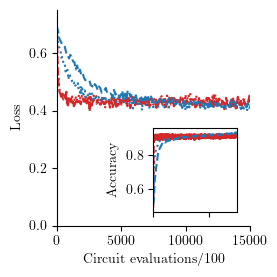

In [8]:
diff_features = [5, 10] # 15

linestyles = list(reversed(['solid', 'dashed', 'dotted'])) #, 'dashdot'
w = 2.5
h = 2.8
batch_size = 25
fig, ax = plt.subplots(figsize=(w, h))
axins = inset_axes(ax, width=w/3, height=h/4 * 1.2, loc=4, borderpad=1)

spsb_step = 100
ps_step = 3
for i, ft in enumerate(diff_features):
    # for (n_feature, batch_size) in hists:

    # NOTE: acc recorded after each epoch, therefor steps[::4]
    axins.plot(evals_spsa[ft][::4]/100, acc_spsa_median[ft] , label='Acc SPSA', color=u'#d62728', linestyle=linestyles[i])
    # ax.fill_between(circ_evals_spsa/100,
    #                     acc_spsa_means - acc_spsa_dev,
    #                     acc_spsa_means + acc_spsa_dev,
    #                     color=u'#d62728', alpha=0.2)
    axins.plot(evals_ps[ft][::4]/100, acc_ps_median[ft], label='Acc PS', color=u'#1f77b4', linestyle=linestyles[i])
    # ax.fill_between(circ_evals_pmshift/100,
    #                     acc_pms_means - acc_pms_dev,
    #                     acc_pms_means + acc_pms_dev,
    #                     color=u'#2ca02c', alpha=0.2)
    ax.plot(evals_spsa[ft][::spsb_step]/100,loss_spsa_median[ft][::spsb_step], label=f'$N_f$ = {ft:<3}', color=u'#d62728', linestyle=linestyles[i])
    # ax.fill_between(circ_evals_spsa/100,
    #                     loss_spsa_means - loss_spsa_dev,
    #                     loss_spsa_means + loss_spsa_dev,
    #                     color=u'#ff7f0e', alpha=0.2)
    ax.plot(evals_ps[ft][::ps_step]/100 , loss_ps_median[ft][::ps_step], label=f'$N_f$ = {ft:<3}', color=u'#1f77b4', linestyle=linestyles[i])
    # ax.fill_between(circ_evals_pmshift/100,
    #                     loss_pms_means - loss_pms_dev,
    #                     loss_pms_means + loss_pms_dev,
    #                     color=u'#1f77b4', alpha=0.2)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # plt.title(f'SPSA grads vs. gradient shift (s: {s_}, eps: {round(eps, 3)})')
ax.set_xlabel('Circuit evaluations/100')
axins.set_xticks(ax.get_xticks())
axins.set_xbound(ax.get_xbound())
axins.set_xticklabels([])
ax.set_ylabel('Loss', labelpad=5)
ax.set_ylim(0, 0.75)
ax.set_xlim(0,15000)
axins.set_ylabel('Accuracy', labelpad=5)
axins.set_xlim(0,15000)
# sort both labels and handles by labels

PS_label = ax.plot([0.2],[0.2],color="w", label="Param Shift")
SPSA_label = ax.plot([0.2],[0.2], color="w", label="SPSB")
handles, labels = ax.get_legend_handles_labels()
order = [6,1,3,5,7,0,2,4]
#024 135

# ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc = "center left", bbox_to_anchor = (1., 0.5, 0.43, 0))
# labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0].split(' ')[-1]))
# ax.legend(handles, labels, loc = "center left", bbox_to_anchor = (1., 0.5, 0.43, 0))

title_1 = "Param Shift"
title_2 = "SPSB"

savename = f"Pennylane_SPSA_gradshift_full_comparison_fc_first_l3_e100_lr0.01_b{batch_size}_BOTTOM.pdf"
plt.savefig(f"./figs/{savename}", bbox_inches="tight")

## Without FC graph without legend (LHS for report)

In [9]:
folder = 'data_initial_exp_wO_fc/wo'

features = [5, 10, 15]
ps_epochs = [300, 200, 100]
spsb_epochs = [6100, 8066, 6033]

loss_spsa = {}
loss_ps = {}
acc_spsa = {}
acc_ps = {}
evals_spsa = {}
evals_ps = {}
for ft, p_ep, s_ep in zip(features, ps_epochs, spsb_epochs):
    loss_spsa[ft] = np.load(folder + f"fc_spsb_loss_niter10_nfeatures{ft}_nlayers3_batchsize25_nepochs{s_ep}_lr0.01.npy")
    loss_ps[ft] = np.load(folder + f"fc_ps_loss_niter10_nfeatures{ft}_nlayers3_batchsize25_nepochs{p_ep}_lr0.01.npy")
    acc_spsa[ft] = np.load(folder + f"fc_spsb_acc_niter10_nfeatures{ft}_nlayers3_batchsize25_nepochs{s_ep}_lr0.01.npy")
    acc_ps[ft] = np.load(folder + f"fc_ps_acc_niter10_nfeatures{ft}_nlayers3_batchsize25_nepochs{p_ep}_lr0.01.npy")
    evals_spsa[ft] = np.load(folder + f"fc_spsb_evals_niter10_nfeatures{ft}_nlayers3_batchsize25_nepochs{s_ep}_lr0.01.npy")
    evals_ps[ft] = np.load(folder + f"fc_ps_evals_niter10_nfeatures{ft}_nlayers3_batchsize25_nepochs{p_ep}_lr0.01.npy")

In [10]:
# calculate median and 95% confidence interval
loss_spsa_median = {}
loss_ps_median = {}
loss_spsa_ci = {}
loss_ps_ci = {}
acc_spsa_median = {}
acc_ps_median = {}
acc_spsa_ci = {}
acc_ps_ci = {}
for ft in features:
    loss_spsa_median[ft] = np.mean(loss_spsa[ft], axis=0)
    loss_ps_median[ft] = np.mean(loss_ps[ft], axis=0)
    loss_spsa_ci[ft] = 1.96 * np.std(loss_spsa[ft], axis=0) / np.sqrt(loss_spsa[ft].shape[0])
    loss_ps_ci[ft] = 1.96 * np.std(loss_ps[ft], axis=0) / np.sqrt(loss_ps[ft].shape[0])
    acc_spsa_median[ft] = np.mean(acc_spsa[ft], axis=0)
    acc_ps_median[ft] = np.mean(acc_ps[ft], axis=0)
    acc_spsa_ci[ft] = 1.96 * np.std(acc_spsa[ft], axis=0) / np.sqrt(acc_spsa[ft].shape[0])
    acc_ps_ci[ft] = 1.96 * np.std(acc_ps[ft], axis=0) / np.sqrt(acc_ps[ft].shape[0])

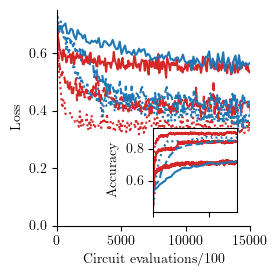

In [11]:
diff_features = [5, 10, 15] #sorted(set([f for f, _ in hists.keys()]))

linestyles = list(reversed(['solid', 'dashed', 'dotted'])) #, 'dashdot'
w = 2.5
h = 2.8
batch_size = 25
fig, ax = plt.subplots(figsize=(w, h))
axins = inset_axes(ax, width=w/3, height=h/4 * 1.2, loc=4, borderpad=1)

spsb_step = 100
ps_step = 3
for i, ft in enumerate(diff_features):
    # for (n_feature, batch_size) in hists:

    # NOTE: acc recorded after each epoch, therefor steps[::4]
    axins.plot(evals_spsa[ft][::4]/100, acc_spsa_median[ft] , label='Acc SPSA', color=u'#d62728', linestyle=linestyles[i])
    # ax.fill_between(circ_evals_spsa/100,
    #                     acc_spsa_means - acc_spsa_dev,
    #                     acc_spsa_means + acc_spsa_dev,
    #                     color=u'#d62728', alpha=0.2)
    axins.plot(evals_ps[ft][::4]/100, acc_ps_median[ft], label='Acc PS', color=u'#1f77b4', linestyle=linestyles[i])
    # ax.fill_between(circ_evals_pmshift/100,
    #                     acc_pms_means - acc_pms_dev,
    #                     acc_pms_means + acc_pms_dev,
    #                     color=u'#2ca02c', alpha=0.2)
    ax.plot(evals_spsa[ft][::spsb_step]/100,loss_spsa_median[ft][::spsb_step], label=f'$N_f$ = {ft:<3}', color=u'#d62728', linestyle=linestyles[i])
    # ax.fill_between(circ_evals_spsa/100,
    #                     loss_spsa_means - loss_spsa_dev,
    #                     loss_spsa_means + loss_spsa_dev,
    #                     color=u'#ff7f0e', alpha=0.2)
    ax.plot(evals_ps[ft][::ps_step]/100 , loss_ps_median[ft][::ps_step], label=f'$N_f$ = {ft:<3}', color=u'#1f77b4', linestyle=linestyles[i])
    # ax.fill_between(circ_evals_pmshift/100,
    #                     loss_pms_means - loss_pms_dev,
    #                     loss_pms_means + loss_pms_dev,
    #                     color=u'#1f77b4', alpha=0.2)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # plt.title(f'SPSA grads vs. gradient shift (s: {s_}, eps: {round(eps, 3)})')
ax.set_xlabel('Circuit evaluations/100')
axins.set_xticks(ax.get_xticks())
axins.set_xbound(ax.get_xbound())
axins.set_xticklabels([])
ax.set_ylabel('Loss', labelpad=5)
ax.set_ylim(0, 0.75)
ax.set_xlim(0,15000)
axins.set_ylabel('Accuracy', labelpad=5)
axins.set_xlim(0,15000)
# sort both labels and handles by labels

PS_label = ax.plot([0.2],[0.2],color="w", label="Param Shift")
SPSA_label = ax.plot([0.2],[0.2], color="w", label="SPSB")
handles, labels = ax.get_legend_handles_labels()
order = [6,1,3,5,7,0,2,4]
#024 135

# ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc = "center left", bbox_to_anchor = (1., 0.5, 0.43, 0))
# labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0].split(' ')[-1]))
# ax.legend(handles, labels, loc = "center left", bbox_to_anchor = (1., 0.5, 0.43, 0))

title_1 = "Param Shift"
title_2 = "SPSB"

# plt.show()
savename = f"Pennylane_SPSA_gradshift_full_comparison_with_fc_l3_e100_lr0.01_b{batch_size}_LEFT.pdf"
plt.savefig(f"./figs/{savename}", bbox_inches="tight")

In [12]:
# # plot loss

# fig, ax = plt.subplots(1, 1, figsize=(6, 4))
# lines = ['-', '--', '-.', ':']
# for i, ft in enumerate(features):
#     # spsa red shades
#     ax.plot(evals_spsa[ft][::100], loss_spsa_median[ft][::100], label=f"SPSA, ft={ft}", color=[1, 0, 0, 1], linestyle=lines[i])
#     # ax.fill_between(np.arange(loss_spsa_median[lr].shape[0]), loss_spsa_median[lr] - loss_spsa_ci[lr], loss_spsa_median[lr] + loss_spsa_ci[lr], alpha=0.2)
#     ax.plot(evals_ps[ft][::5], loss_ps_median[ft][::5], label=f"PS, ft={ft}", color=[0, 0, 1, 1], linestyle=lines[i])
#     # ax.fill_between(np.arange(loss_ps_median[lr].shape[0]), loss_ps_median[lr] - loss_ps_ci[lr], loss_ps_median[lr] + loss_ps_ci[lr], alpha=0.2)
# ax.set_xlabel("Circuit evaluations")
# ax.set_ylabel("Loss")
# # change y scale from 0 to 2.5
# # ax.set_ylim(0.05, 0.75)
# ax.set_xlim(0,1.5e6)
# # legend outside to right
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))